In [1]:
import json
import requests
import pandas as pd
import os
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
API_KEY = os.getenv("GLASSNODE_API_KEY")
type(API_KEY)

str

In [4]:
# define coin
coin = 'BTC'

In [5]:
# Build the first of three Level-2-Dataframes: Network Health

In [6]:
## Extract active address data

In [7]:
active_address = requests.get('https://api.glassnode.com/v1/metrics/addresses/active_count', params={'a': coin, 'api_key': API_KEY})

In [8]:
active_address_df = pd.read_json(active_address.text, convert_dates=['t'])
active_address_df.set_index('t', inplace=True)
active_address_df=active_address_df.rename(columns={'v':'Active Address'})
active_address_df

,Active Address
t,
2009-01-03,0
2009-01-04,0
2009-01-05,0
2009-01-06,0
2009-01-07,0
...,...
2021-07-03,1022345
2021-07-04,850487
2021-07-05,920363


<AxesSubplot:title={'center':'Active Address'}, xlabel='t'>

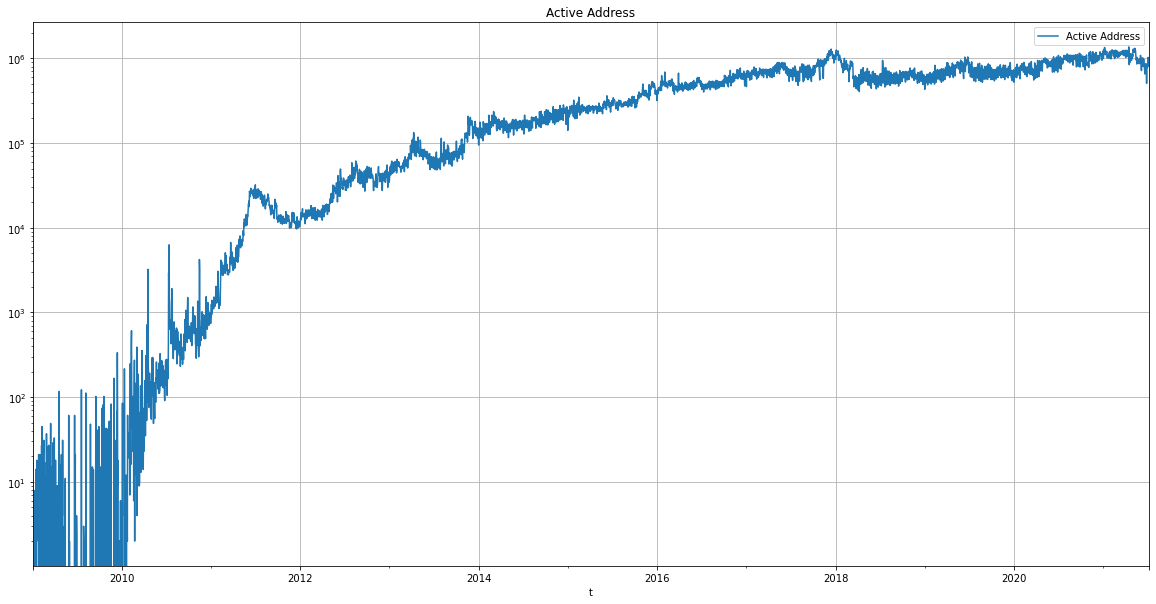

In [9]:
active_address_df.plot(figsize=(20,10), grid=True, logy=True, title='Active Address')

In [10]:
## Extract total transfer volume data

In [11]:
total_transfer_volume = requests.get('https://api.glassnode.com/v1/metrics/transactions/transfers_volume_sum', params={'a': coin, 'api_key': API_KEY})

In [12]:
total_transfer_volume_df = pd.read_json(total_transfer_volume.text, convert_dates=['t'])
total_transfer_volume_df.set_index('t', inplace=True)
total_transfer_volume_df = total_transfer_volume_df.rename(columns={'v':'Total Transfer Volume'})
total_transfer_volume_df

,Total Transfer Volume
t,
2009-01-03,0.000000e+00
2009-01-04,0.000000e+00
2009-01-05,0.000000e+00
2009-01-06,0.000000e+00
2009-01-07,0.000000e+00
...,...
2021-07-03,1.295536e+06
2021-07-04,1.586243e+06
2021-07-05,1.439888e+06


<AxesSubplot:title={'center':'Total Transfer Volume'}, xlabel='t'>

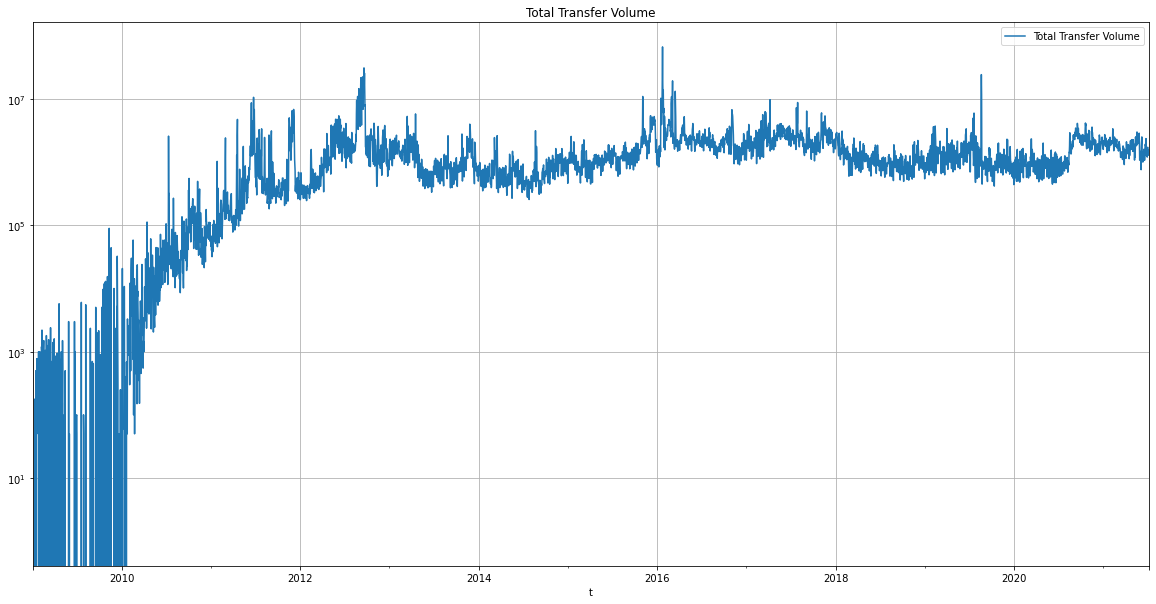

In [13]:
total_transfer_volume_df.plot(figsize=(20,10), grid=True, logy=True, title='Total Transfer Volume')

In [14]:
## Extract velocity data

In [15]:
velocity = requests.get('https://api.glassnode.com/v1/metrics/indicators/velocity', params={'a': coin, 'api_key': API_KEY})

In [16]:
velocity_df = pd.read_json(velocity.text, convert_dates=['t'])
velocity_df.set_index('t', inplace=True)
velocity_df = velocity_df.rename(columns={'v':'Velocity'})
velocity_df

,Velocity
t,
2010-07-18,0.010432
2010-07-19,0.013640
2010-07-20,0.008629
2010-07-21,0.007955
2010-07-22,0.011374
...,...
2021-07-03,0.021720
2021-07-04,0.025518
2021-07-05,0.017975


<AxesSubplot:title={'center':'Velocity'}, xlabel='t'>

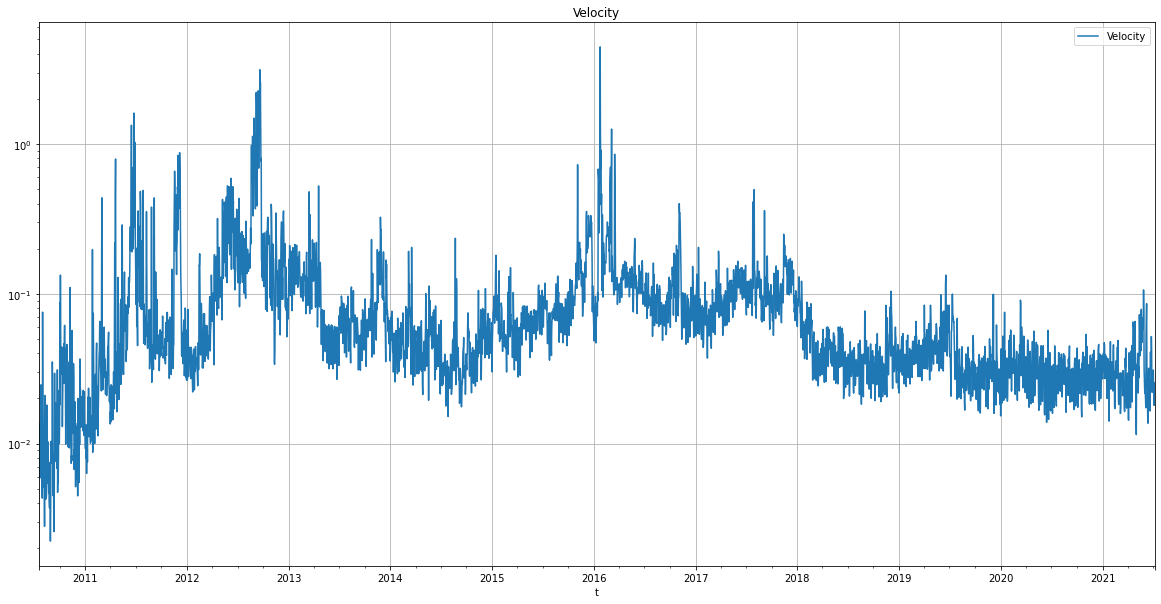

In [17]:
velocity_df.plot(figsize=(20,10), grid=True, logy=True, title='Velocity')

In [18]:
## Extract transaction count data

In [19]:
transaction_count= requests.get('https://api.glassnode.com/v1/metrics/transactions/count', params={'a': coin, 'api_key': API_KEY})

In [20]:
transaction_count_df = pd.read_json(transaction_count.text, convert_dates=['t'])
transaction_count_df.set_index('t', inplace=True)
transaction_count_df = transaction_count_df.rename(columns={'v':'Transaction Count'})
transaction_count_df

,Transaction Count
t,
2009-01-03,0
2009-01-04,0
2009-01-05,0
2009-01-06,0
2009-01-07,0
...,...
2021-07-03,237336
2021-07-04,171735
2021-07-05,223628


<AxesSubplot:title={'center':'Transaction Count'}, xlabel='t'>

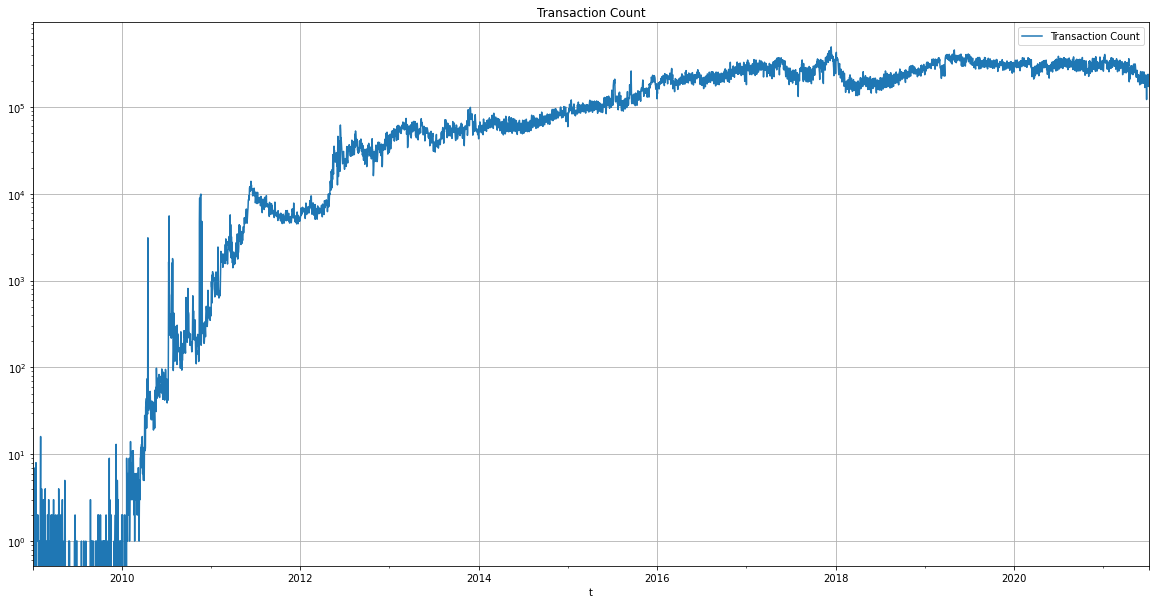

In [21]:
transaction_count_df.plot(figsize=(20,10), grid=True, logy=True, title='Transaction Count')

In [22]:
### Build Level-3-Dataframe: Usage

In [23]:
usage_df_l3 = pd.concat([active_address_df,total_transfer_volume_df,velocity_df,transaction_count_df],axis=1).dropna()
usage_df_l3

,Active Address,Total Transfer Volume,Velocity,Transaction Count
t,,,,
2010-07-18,757,3.606926e+04,0.010432,248
2010-07-19,808,4.714966e+04,0.013640,354
2010-07-20,728,2.990234e+04,0.008629,413
2010-07-21,621,2.765454e+04,0.007955,256
2010-07-22,427,3.963162e+04,0.011374,221
...,...,...,...,...
2021-07-03,1022345,1.295536e+06,0.021720,237336
2021-07-04,850487,1.586243e+06,0.025518,171735
2021-07-05,920363,1.439888e+06,0.017975,223628


In [24]:
#### Evaluate correlation among columns

In [25]:
usage_df_l3.corr()

,Active Address,Total Transfer Volume,Velocity,Transaction Count
Active Address,1.000000,0.142214,-0.154729,0.943223
Total Transfer Volume,0.142214,1.000000,0.884730,0.162451
Velocity,-0.154729,0.884730,1.000000,-0.130641
Transaction Count,0.943223,0.162451,-0.130641,1.000000


In [26]:
### Drop Transaction Count due to high correlation with Active Address.

In [27]:
usage_df_l3 = usage_df_l3.drop(columns='Transaction Count')
usage_df_l3

,Active Address,Total Transfer Volume,Velocity
t,,,
2010-07-18,757,3.606926e+04,0.010432
2010-07-19,808,4.714966e+04,0.013640
2010-07-20,728,2.990234e+04,0.008629
2010-07-21,621,2.765454e+04,0.007955
2010-07-22,427,3.963162e+04,0.011374
...,...,...,...
2021-07-03,1022345,1.295536e+06,0.021720
2021-07-04,850487,1.586243e+06,0.025518
2021-07-05,920363,1.439888e+06,0.017975


In [28]:
## Extract circulating supply data

In [29]:
circulating_supply= requests.get('https://api.glassnode.com/v1/metrics/supply/current', params={'a': coin, 'api_key': API_KEY})

In [30]:
circulating_supply_df = pd.read_json(circulating_supply.text, convert_dates=['t'])
circulating_supply_df.set_index('t', inplace=True)
circulating_supply_df = circulating_supply_df.rename(columns={'v':'Circulating Supply'})
circulating_supply_df

,Circulating Supply
t,
2009-01-03,50.00
2009-01-04,50.00
2009-01-05,50.00
2009-01-06,50.00
2009-01-07,50.00
...,...
2021-07-03,18747312.50
2021-07-04,18748031.25
2021-07-05,18748856.25


<AxesSubplot:title={'center':'Circulating Supply'}, xlabel='t'>

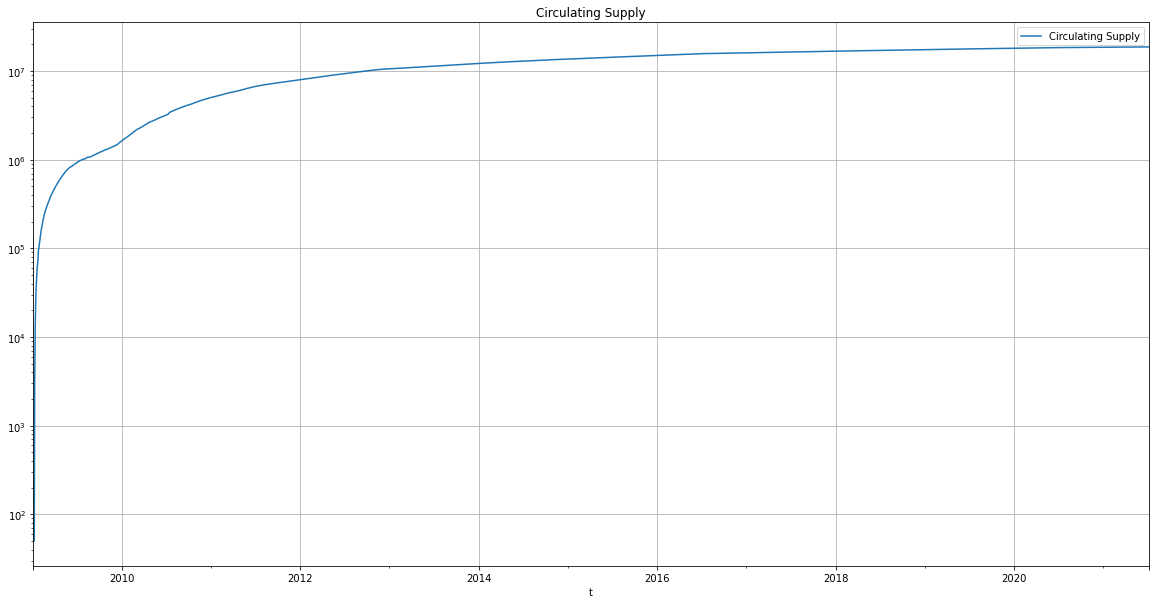

In [31]:
circulating_supply_df.plot(figsize=(20,10), grid=True, logy=True, title='Circulating Supply')

In [32]:
## Extract issuance data

In [33]:
issuance = requests.get('https://api.glassnode.com/v1/metrics/supply/issued', params={'a': coin, 'api_key': API_KEY})

In [34]:
issuance_df = pd.read_json(issuance.text, convert_dates=['t'])
issuance_df.set_index('t', inplace=True)
issuance_df = issuance_df.rename(columns={'v':'Issuance'})
issuance_df

,Issuance
t,
2009-01-03,50.00
2009-01-04,0.00
2009-01-05,0.00
2009-01-06,0.00
2009-01-07,0.00
...,...
2021-07-03,793.75
2021-07-04,718.75
2021-07-05,825.00


<AxesSubplot:title={'center':'Issuance'}, xlabel='t'>

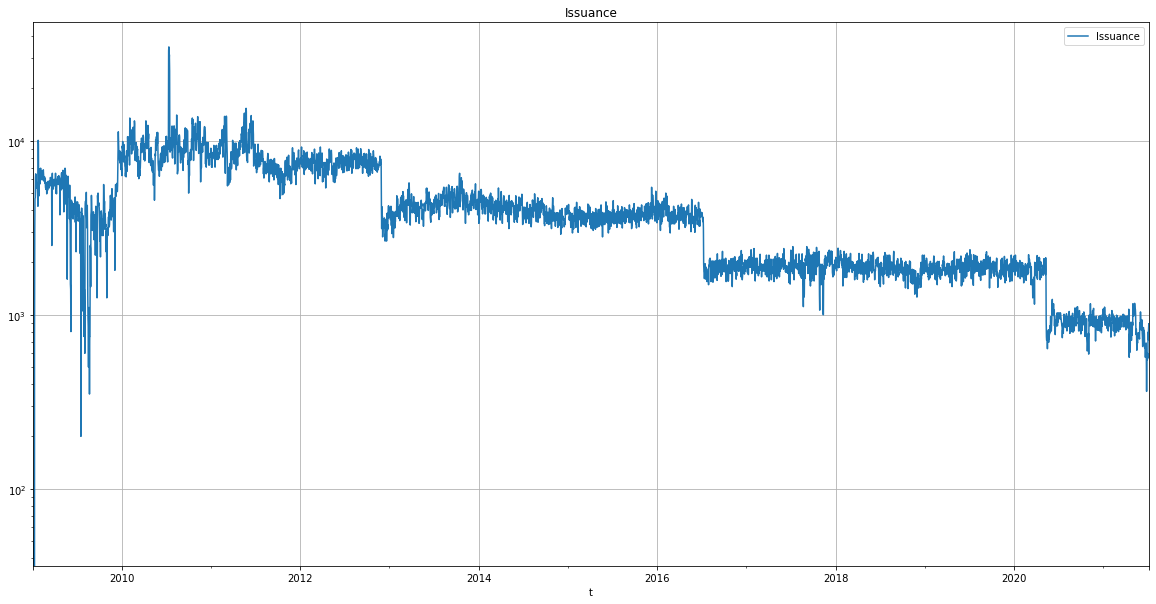

In [35]:
issuance_df.plot(figsize=(20,10), grid=True, logy=True, title='Issuance')

In [36]:
### Build Level-3-Dataframe: monetary_integrity_df_l3

In [37]:
monetary_integrity_df_l3 = pd.concat([circulating_supply_df,issuance_df],axis=1).dropna()
monetary_integrity_df_l3

,Circulating Supply,Issuance
t,,
2009-01-03,50.00,50.00
2009-01-04,50.00,0.00
2009-01-05,50.00,0.00
2009-01-06,50.00,0.00
2009-01-07,50.00,0.00
...,...,...
2021-07-03,18747312.50,793.75
2021-07-04,18748031.25,718.75
2021-07-05,18748856.25,825.00


In [38]:
monetary_integrity_df_l3.corr()

,Circulating Supply,Issuance
Circulating Supply,1.000000,-0.736225
Issuance,-0.736225,1.000000


In [39]:
## Extract hash rate data

In [40]:
# hash_rate = requests.get('https://api.glassnode.com/v1/metrics/indicators/hash_ribbon', params={'a': coin, 'api_key': API_KEY})

In [41]:
# import json
# pd.io.json._json.loads = lambda s, *a, **k: json.load(hash_rate.text)
# hash_rate_df = json.loads(hash_rate.text)
# hash_rate_df = pd.DataFrame(hash_rate_df)
# hash_rate_df = hash_rate_df.set_index('t')
# hash_rate_df.index = pd.to_datetime(hash_rate_df.index, unit='s')
# hash_rate_df = hash_rate_df.rename(columns={'v':'Hash Rate'})
# hash_rate_df.tail()


In [42]:
#hash_rate_df.dtypes

In [43]:
#hash_rate_df = hash_rate_df[:'2019-08-01']

In [44]:
# import sys
# sys.maxsize

In [45]:
# hash_rate_df.dtypes

# hash_rate_df['Hash Rate'] = hash_rate_df["Hash Rate"].astype('int64')

In [46]:
# hash_rate_df.plot(figsize=(20,10), grid=True, logy=True, title='Hash Rate');

In [47]:
## Extract miner revenue data

In [48]:
#import json
#pd.io.json._json.loads = lambda s, *a, **k: json.load(hash_rate.text)

In [49]:
## Extract Miner Revenue data

In [50]:
miner_revenue = requests.get('https://api.glassnode.com/v1/metrics/mining/revenue_sum', params={'a': coin, 'api_key': API_KEY})

In [51]:
miner_revenue_df = pd.read_json(miner_revenue.text, convert_dates=['t'])
miner_revenue_df.set_index('t', inplace=True)
miner_revenue_df = miner_revenue_df.rename(columns={'v':'Miner Revenue'})
miner_revenue_df

,Miner Revenue
t,
2009-01-03,50.000000
2009-01-04,0.000000
2009-01-05,0.000000
2009-01-06,0.000000
2009-01-07,0.000000
...,...
2021-07-03,852.952513
2021-07-04,762.180650
2021-07-05,872.545607


<AxesSubplot:title={'center':'Miner Revenue'}, xlabel='t'>

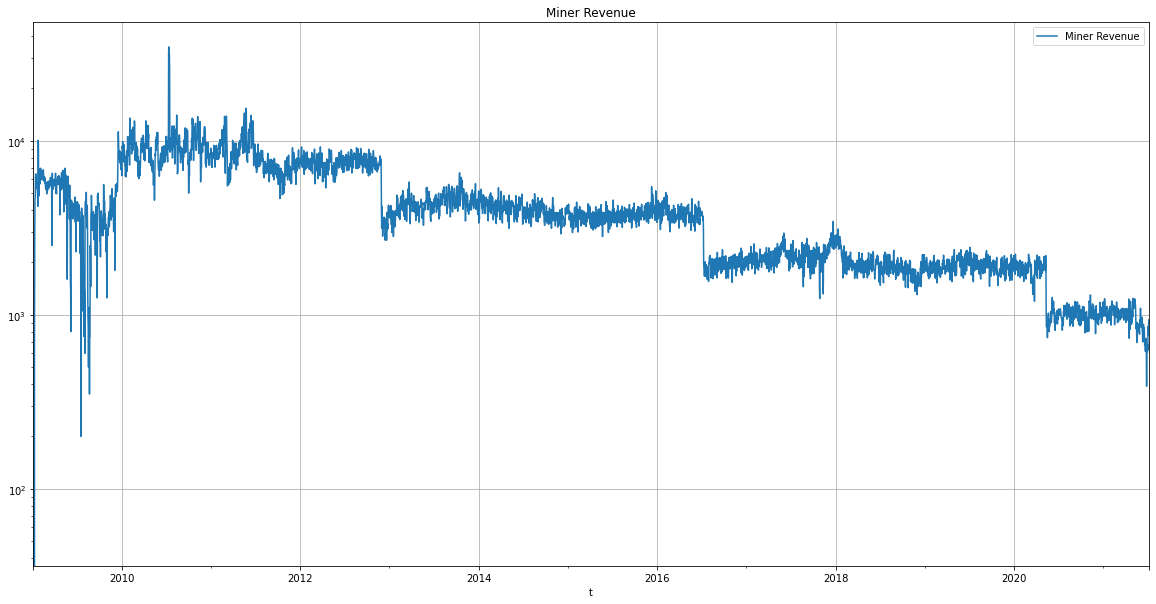

In [52]:
miner_revenue_df.plot(figsize=(20,10), grid=True, logy=True, title='Miner Revenue')

In [53]:
## Extract difficulty data

In [54]:
difficulty = requests.get('https://api.glassnode.com/v1/metrics/indicators/difficulty_ribbon_compression', params={'a': coin, 'api_key': API_KEY})

In [55]:
difficulty_df = pd.read_json(difficulty.text, convert_dates=['t'])
difficulty_df.set_index('t', inplace=True)
difficulty_df = difficulty_df.rename(columns={'v':'Difficulty'})
difficulty_df

,Difficulty
t,
2009-07-28,0.000000
2009-07-29,0.000000
2009-07-30,0.000000
2009-07-31,0.000000
2009-08-01,0.000000
...,...
2021-07-03,0.050454
2021-07-04,0.059414
2021-07-05,0.068791


<AxesSubplot:title={'center':'Difficulty'}, xlabel='t'>

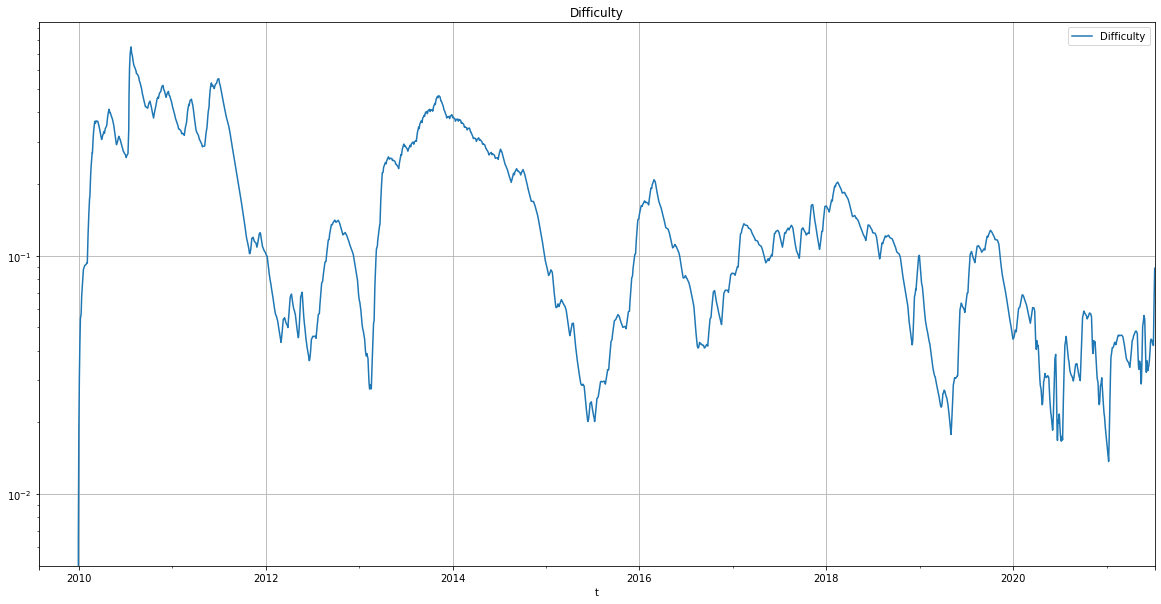

In [56]:
difficulty_df.plot(figsize=(20,10), grid=True, logy=True, title='Difficulty')

In [57]:
## Extract Thrermocap data

In [58]:
thermocap = requests.get('https://api.glassnode.com/v1/metrics/mining/thermocap', params={'a': coin, 'api_key': API_KEY})

In [59]:
thermocap_df = pd.read_json(thermocap.text, convert_dates=['t'])
thermocap_df.set_index('t', inplace=True)
thermocap_df = thermocap_df.rename(columns={'v':'Thermocap'})
thermocap_df

,Thermocap
t,
2010-07-18,1.708201e+05
2010-07-19,1.716100e+05
2010-07-20,1.723301e+05
2010-07-21,1.730580e+05
2010-07-22,1.736565e+05
...,...
2021-07-03,2.719345e+10
2021-07-04,2.721879e+10
2021-07-05,2.724693e+10


<AxesSubplot:title={'center':'Thermocap'}, xlabel='t'>

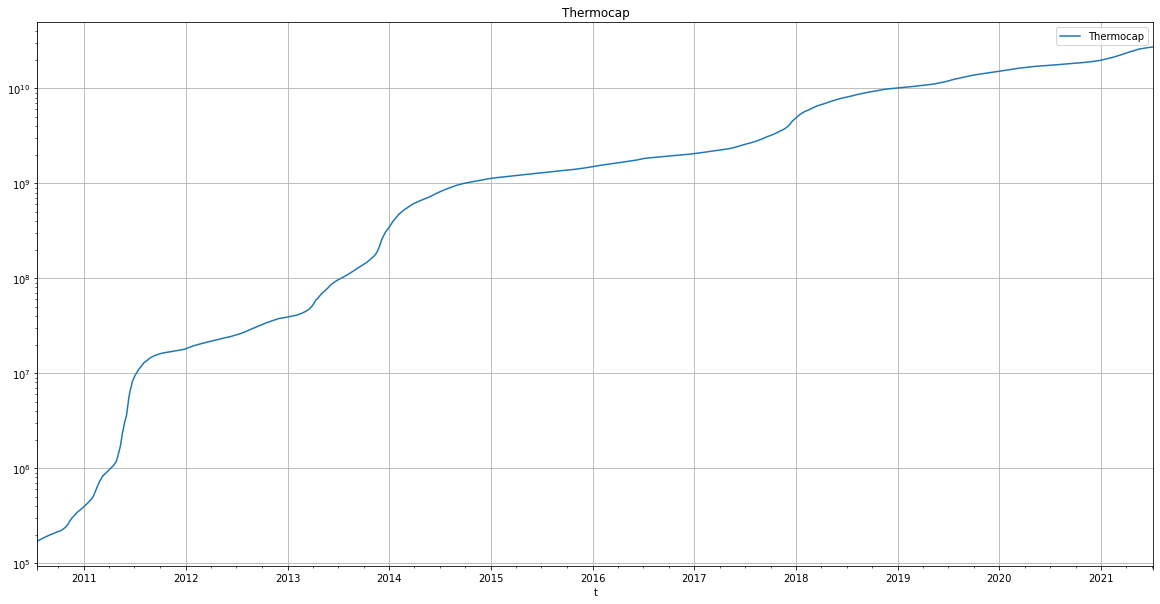

In [60]:
thermocap_df.plot(figsize=(20,10), grid=True, logy=True, title='Thermocap')

In [61]:
### Build Level-3-Dataframe: security_df_l3

In [62]:
security_df_l3 = pd.concat([miner_revenue_df,difficulty_df, thermocap_df],axis=1).dropna()
security_df_l3

,Miner Revenue,Difficulty,Thermocap
t,,,
2010-07-18,8600.830000,0.608607,1.708201e+05
2010-07-19,8700.090000,0.652693,1.716100e+05
2010-07-20,9050.000000,0.686378,1.723301e+05
2010-07-21,10350.000000,0.713103,1.730580e+05
2010-07-22,8800.000000,0.728067,1.736565e+05
...,...,...,...
2021-07-03,852.952513,0.050454,2.719345e+10
2021-07-04,762.180650,0.059414,2.721879e+10
2021-07-05,872.545607,0.068791,2.724693e+10


In [63]:
security_df_l3.corr()

,Miner Revenue,Difficulty,Thermocap
Miner Revenue,1.000000,0.615051,-0.633551
Difficulty,0.615051,1.000000,-0.461438
Thermocap,-0.633551,-0.461438,1.000000


In [64]:
# Build the second of three Level-2-Dataframes: Network Health

In [65]:
network_health_df_l2 = pd.concat([usage_df_l3,monetary_integrity_df_l3,security_df_l3],axis=1).dropna()

In [66]:
network_health_df_l2

,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Miner Revenue,Difficulty,Thermocap
t,,,,,,,,
2010-07-18,757.0,3.606926e+04,0.010432,3447600.00,8600.00,8600.830000,0.608607,1.708201e+05
2010-07-19,808.0,4.714966e+04,0.013640,3456300.00,8700.00,8700.090000,0.652693,1.716100e+05
2010-07-20,728.0,2.990234e+04,0.008629,3465350.00,9050.00,9050.000000,0.686378,1.723301e+05
2010-07-21,621.0,2.765454e+04,0.007955,3475700.00,10350.00,10350.000000,0.713103,1.730580e+05
2010-07-22,427.0,3.963162e+04,0.011374,3484500.00,8800.00,8800.000000,0.728067,1.736565e+05
...,...,...,...,...,...,...,...,...
2021-07-03,1022345.0,1.295536e+06,0.021720,18747312.50,793.75,852.952513,0.050454,2.719345e+10
2021-07-04,850487.0,1.586243e+06,0.025518,18748031.25,718.75,762.180650,0.059414,2.721879e+10
2021-07-05,920363.0,1.439888e+06,0.017975,18748856.25,825.00,872.545607,0.068791,2.724693e+10


In [67]:
network_health_df_l2.corr()

,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Miner Revenue,Difficulty,Thermocap
Active Address,1.000000,0.142214,-0.154729,0.878549,-0.810901,-0.801636,-0.546472,0.804081
Total Transfer Volume,0.142214,1.000000,0.884730,0.143275,-0.086743,-0.081022,-0.174596,0.000918
Velocity,-0.154729,0.884730,1.000000,-0.135756,0.187159,0.190000,-0.014290,-0.204681
Circulating Supply,0.878549,0.143275,-0.135756,1.000000,-0.934478,-0.933398,-0.670978,0.700433
Issuance,-0.810901,-0.086743,0.187159,-0.934478,1.000000,0.999319,0.613801,-0.630161
Miner Revenue,-0.801636,-0.081022,0.190000,-0.933398,0.999319,1.000000,0.615051,-0.633551
Difficulty,-0.546472,-0.174596,-0.014290,-0.670978,0.613801,0.615051,1.000000,-0.461438
Thermocap,0.804081,0.000918,-0.204681,0.700433,-0.630161,-0.633551,-0.461438,1.000000


In [68]:
# Due to the high correlation between Issuance and Miner Revenue, drop Miner Revenue from security_df_l3

In [69]:
security_df_l3=security_df_l3.drop(columns='Miner Revenue')

In [70]:
security_df_l3

,Difficulty,Thermocap
t,,
2010-07-18,0.608607,1.708201e+05
2010-07-19,0.652693,1.716100e+05
2010-07-20,0.686378,1.723301e+05
2010-07-21,0.713103,1.730580e+05
2010-07-22,0.728067,1.736565e+05
...,...,...
2021-07-03,0.050454,2.719345e+10
2021-07-04,0.059414,2.721879e+10
2021-07-05,0.068791,2.724693e+10


In [71]:
network_health_df_l2= pd.concat([usage_df_l3,monetary_integrity_df_l3,security_df_l3],axis=1).dropna()
network_health_df_l2.corr()

,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Difficulty,Thermocap
Active Address,1.000000,0.142214,-0.154729,0.878549,-0.810901,-0.546472,0.804081
Total Transfer Volume,0.142214,1.000000,0.884730,0.143275,-0.086743,-0.174596,0.000918
Velocity,-0.154729,0.884730,1.000000,-0.135756,0.187159,-0.014290,-0.204681
Circulating Supply,0.878549,0.143275,-0.135756,1.000000,-0.934478,-0.670978,0.700433
Issuance,-0.810901,-0.086743,0.187159,-0.934478,1.000000,0.613801,-0.630161
Difficulty,-0.546472,-0.174596,-0.014290,-0.670978,0.613801,1.000000,-0.461438
Thermocap,0.804081,0.000918,-0.204681,0.700433,-0.630161,-0.461438,1.000000


In [72]:
# Build the second of three Level-2-Dataframes: Buyer & Seller Behavior

In [73]:
## Extract Miner Unspent Supply (UTXO)

In [74]:
utxo = requests.get('https://api.glassnode.com/v1/metrics/mining/miners_unspent_supply', params={'a': coin, 'api_key': API_KEY})

In [75]:
utxo_df = pd.read_json(utxo.text, convert_dates=['t'])
utxo_df.set_index('t', inplace=True)
utxo_df = utxo_df.rename(columns={'v':'UTXO'})
utxo_df

,UTXO
t,
2009-01-03,5.000000e+01
2009-01-04,5.000000e+01
2009-01-05,5.000000e+01
2009-01-06,5.000000e+01
2009-01-07,5.000000e+01
...,...
2020-07-03,1.765402e+06
2020-07-04,1.765388e+06
2020-07-05,1.765754e+06


In [76]:
## Extract Coin Years Destroyed (CYD)  

In [77]:
cyd = requests.get('https://api.glassnode.com/v1/metrics/indicators/cyd', params={'a': coin, 'api_key': API_KEY})

In [78]:
cyd_df = pd.read_json(cyd.text, convert_dates=['t'])
cyd_df.set_index('t', inplace=True)
cyd_df = cyd_df.rename(columns={'v':'CYD'})
cyd_df

,CYD
t,
2010-01-11,3.461755e+06
2010-01-12,3.943371e+06
2010-01-13,3.943582e+06
2010-01-14,3.949321e+06
2010-01-15,3.949512e+06
...,...
2021-07-03,4.570483e+09
2021-07-04,4.571374e+09
2021-07-05,4.574433e+09


In [79]:
## Net Unrealized Profit & Losses (NUPL) 

In [80]:
nupl = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [81]:
nupl_df = pd.read_json(nupl.text, convert_dates=['t'])
nupl_df.set_index('t', inplace=True)
nupl_df = nupl_df.rename(columns={'v':'NUPL'})
nupl_df

,NUPL
t,
2010-07-18,0.421756
2010-07-19,0.380821
2010-07-20,0.328775
2010-07-21,0.365481
2010-07-22,0.102038
...,...
2021-07-03,0.441871
2021-07-04,0.451348
2021-07-05,0.427749


In [82]:
## Realized Cap (RC) 

In [83]:
rc = requests.get('https://api.glassnode.com/v1/metrics/market/marketcap_realized_usd', params={'a': coin, 'api_key': API_KEY})

In [84]:
rc_df = pd.read_json(rc.text, convert_dates=['t'])
rc_df.set_index('t', inplace=True)
rc_df = rc_df.rename(columns={'v':'Realized Cap'})
rc_df

,Realized Cap
t,
2009-01-03,2.475500e+00
2009-01-04,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
...,...
2021-07-03,3.627081e+11
2021-07-04,3.628415e+11
2021-07-05,3.627696e+11


In [85]:
# Build the second of three Level-2-Dataframes: Buyer & Seller Behavior

In [86]:
buyer_and_seller_behavior_df_l2=pd.concat([utxo_df,cyd_df,nupl_df,rc_df],axis=1).dropna()
buyer_and_seller_behavior_df_l2

,UTXO,CYD,NUPL,Realized Cap
t,,,,
2010-07-18,2.382007e+06,5.396822e+07,0.421756,1.711265e+05
2010-07-19,2.379557e+06,5.441558e+07,0.380821,1.729175e+05
2010-07-20,2.383107e+06,5.440775e+07,0.328775,1.738318e+05
2010-07-21,2.381757e+06,5.530445e+07,0.365481,1.746896e+05
2010-07-22,2.387157e+06,5.557529e+07,0.102038,1.750491e+05
...,...,...,...,...
2020-07-03,1.765402e+06,3.079610e+09,0.357569,1.073762e+11
2020-07-04,1.765388e+06,3.072421e+09,0.359855,1.073903e+11
2020-07-05,1.765754e+06,3.071930e+09,0.357381,1.073967e+11


In [87]:
buyer_and_seller_behavior_df_l2.corr()

,UTXO,CYD,NUPL,Realized Cap
UTXO,1.000000,-0.760605,0.097451,-0.571609
CYD,-0.760605,1.000000,0.140360,0.757470
NUPL,0.097451,0.140360,1.000000,-0.019556
Realized Cap,-0.571609,0.757470,-0.019556,1.000000


In [88]:
# Build the third of three Level-2-Dataframes: Valuation

In [89]:
## Extact stock-to-flow data

In [90]:
stf = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [91]:
stf_df = pd.read_json(stf.text, convert_dates=['t'])
stf_df.set_index('t', inplace=True)
stf_df = stf_df.rename(columns={'v':'Stock to Flow'})
stf_df

,Stock to Flow
t,
2010-07-18,0.421756
2010-07-19,0.380821
2010-07-20,0.328775
2010-07-21,0.365481
2010-07-22,0.102038
...,...
2021-07-03,0.441871
2021-07-04,0.451348
2021-07-05,0.427749


<AxesSubplot:title={'center':'Stock to Flow'}, xlabel='t'>

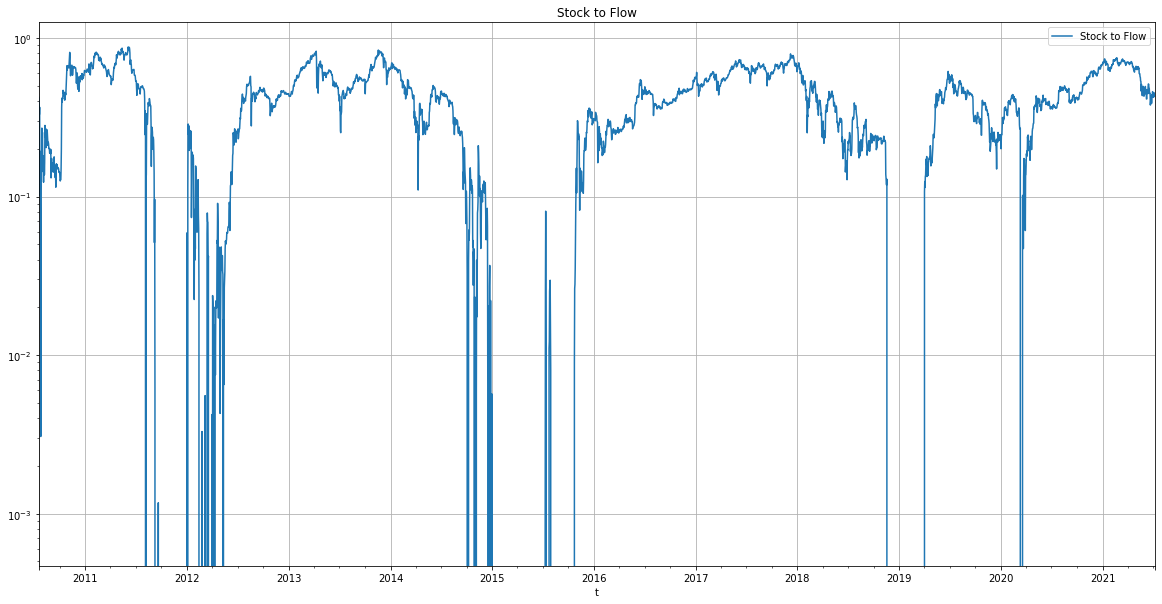

In [92]:
stf_df.plot(figsize=(20,10), grid=True, logy=True, title='Stock to Flow')

In [93]:
## Extract Market Cap to Thermocap Ratio

In [94]:
mcttc = requests.get('https://api.glassnode.com/v1/metrics/indicators/net_unrealized_profit_loss', params={'a': coin, 'api_key': API_KEY})

In [95]:
mcttc_df = pd.read_json(mcttc.text, convert_dates=['t'])
mcttc_df.set_index('t', inplace=True)
mcttc_df = mcttc_df.rename(columns={'v':'Market Cap/Thermo Cap'})
mcttc_df

,Market Cap/Thermo Cap
t,
2010-07-18,0.421756
2010-07-19,0.380821
2010-07-20,0.328775
2010-07-21,0.365481
2010-07-22,0.102038
...,...
2021-07-03,0.441871
2021-07-04,0.451348
2021-07-05,0.427749


<AxesSubplot:title={'center':'Market Cap/Thermo Cap'}, xlabel='t'>

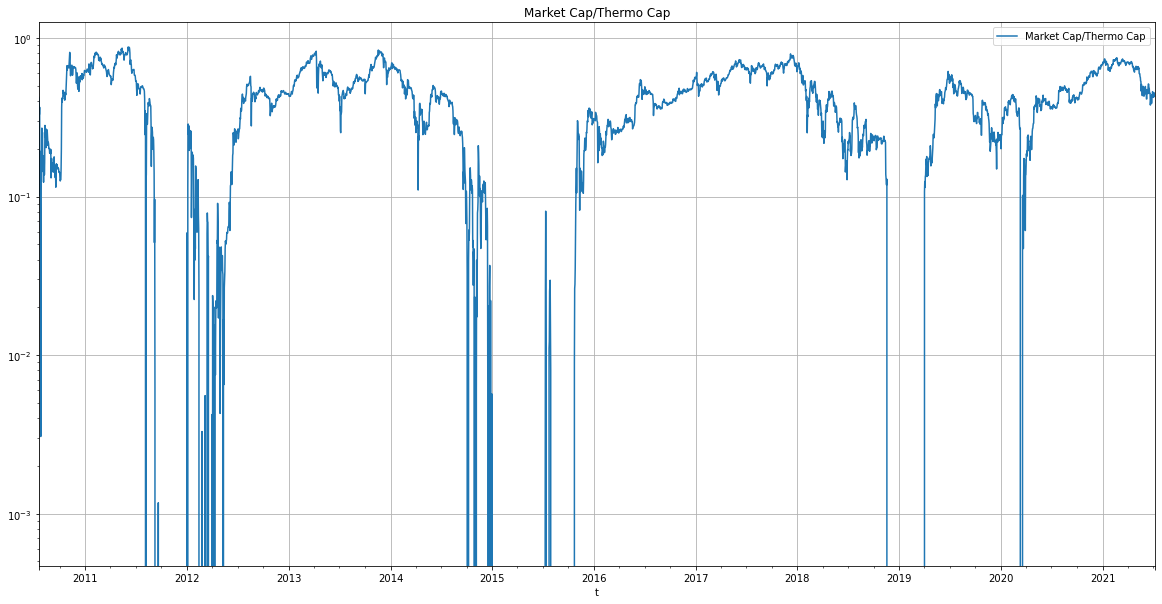

In [96]:
mcttc_df.plot(figsize=(20,10), grid=True, logy=True, title='Market Cap/Thermo Cap')

In [97]:
## Extract SOPR data

In [98]:
sopr = requests.get('https://api.glassnode.com/v1/metrics/indicators/sopr', params={'a': coin, 'api_key': API_KEY})

In [99]:
sopr_df = pd.read_json(sopr.text, convert_dates=['t'])
sopr_df.set_index('t', inplace=True)
sopr_df = sopr_df.rename(columns={'v':'SOPR'})
sopr_df

,SOPR
t,
2010-07-17,1.000000
2010-07-18,1.174760
2010-07-19,1.318536
2010-07-20,1.090517
2010-07-21,1.065532
...,...
2021-07-03,1.001079
2021-07-04,1.001935
2021-07-05,0.997970


<AxesSubplot:title={'center':'SOPR'}, xlabel='t'>

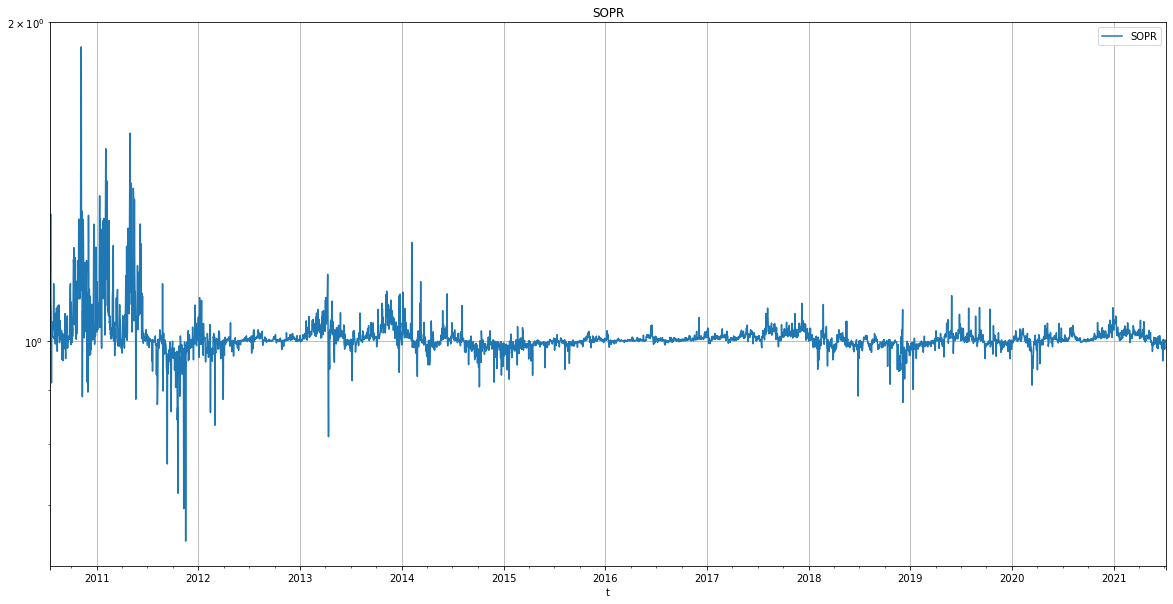

In [100]:
sopr_df.plot(figsize=(20,10), grid=True, logy=True, title='SOPR')

In [101]:
## Extract Futures Perpetual Funding Rates data

In [102]:
fpfr = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_funding_rate_perpetual', params={'a': coin, 'api_key': API_KEY})

In [103]:
fpfr_df = pd.read_json(fpfr.text, convert_dates=['t'])
fpfr_df.set_index('t', inplace=True)
fpfr_df = fpfr_df.rename(columns={'v':'Futures Peretual Funding Rates'})
fpfr_df

,Futures Peretual Funding Rates
t,
2021-06-08,0.000058
2021-06-09,-0.000186
2021-06-10,0.000029
2021-06-11,0.000012
2021-06-12,-0.000065
2021-06-13,0.000019
2021-06-14,0.000040
2021-06-15,0.000047
2021-06-16,-0.000005


<AxesSubplot:title={'center':'Futures Perpetual Funding Rates'}, xlabel='t'>

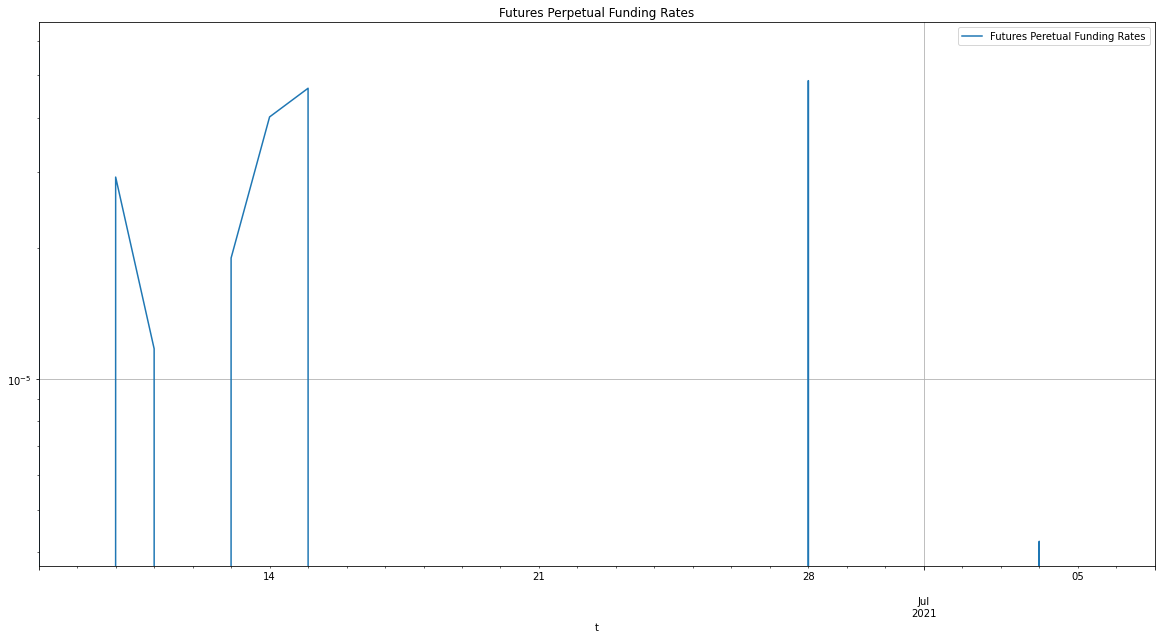

In [104]:
fpfr_df.plot(figsize=(20,10), grid=True, logy=True, title='Futures Perpetual Funding Rates')

In [105]:
## Extract Futures Estimated Leverage Ratio

In [106]:
felr = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_estimated_leverage_ratio', params={'a': coin, 'api_key': API_KEY})

In [107]:
felr_df = pd.read_json(felr.text, convert_dates=['t'])
felr_df.set_index('t', inplace=True)
felr_df = felr_df.rename(columns={'v':'Futures Estimated Leverage Ratio'})
felr_df

,Futures Estimated Leverage Ratio
t,
2020-05-15,0.166281
2020-05-16,0.165119
2020-05-17,0.170652
2020-05-18,0.167470
2020-05-19,0.166283
...,...
2021-07-03,0.155232
2021-07-04,0.155267
2021-07-05,0.157703


<AxesSubplot:title={'center':'Futures Estimated Leverage Ratio'}, xlabel='t'>

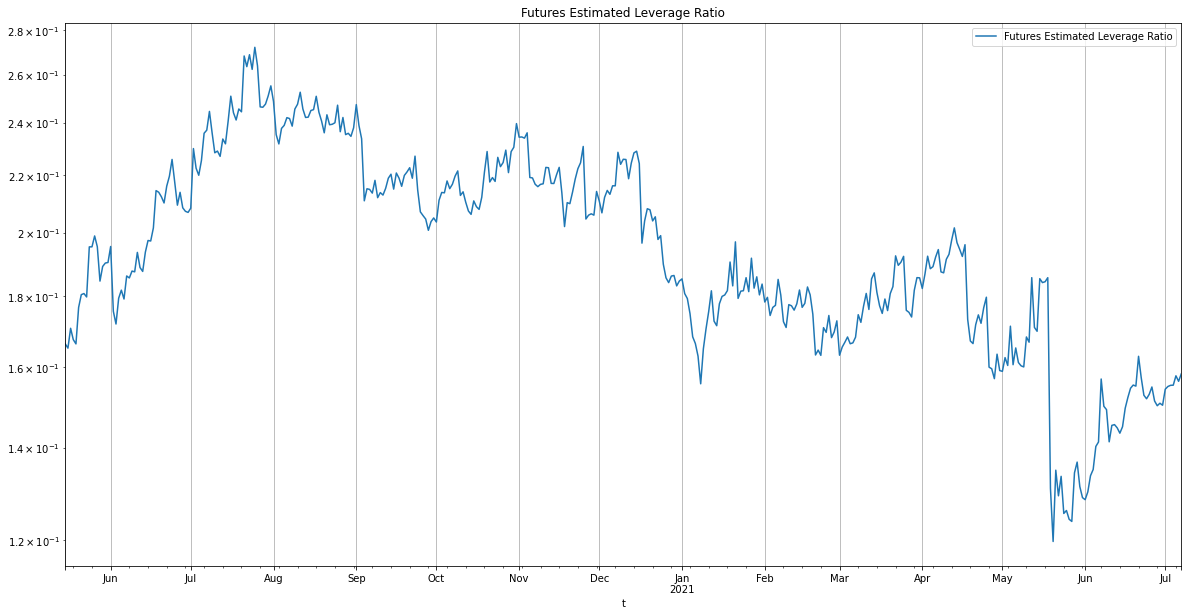

In [108]:
felr_df.plot(figsize=(20,10), grid=True, logy=True, title='Futures Estimated Leverage Ratio')

In [109]:
## Extract MVRV Ratio

In [110]:
mvrv = requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_estimated_leverage_ratio', params={'a': coin, 'api_key': API_KEY})

In [111]:
mvrv_df = pd.read_json(mvrv.text, convert_dates=['t'])
mvrv_df.set_index('t', inplace=True)
mvrv_df = mvrv_df.rename(columns={'v':'Market Value/Realized Value'})
mvrv_df

,Market Value/Realized Value
t,
2020-05-15,0.166281
2020-05-16,0.165119
2020-05-17,0.170652
2020-05-18,0.167470
2020-05-19,0.166283
...,...
2021-07-03,0.155232
2021-07-04,0.155267
2021-07-05,0.157703


<AxesSubplot:title={'center':'Market Value to Realized Value Ratio'}, xlabel='t'>

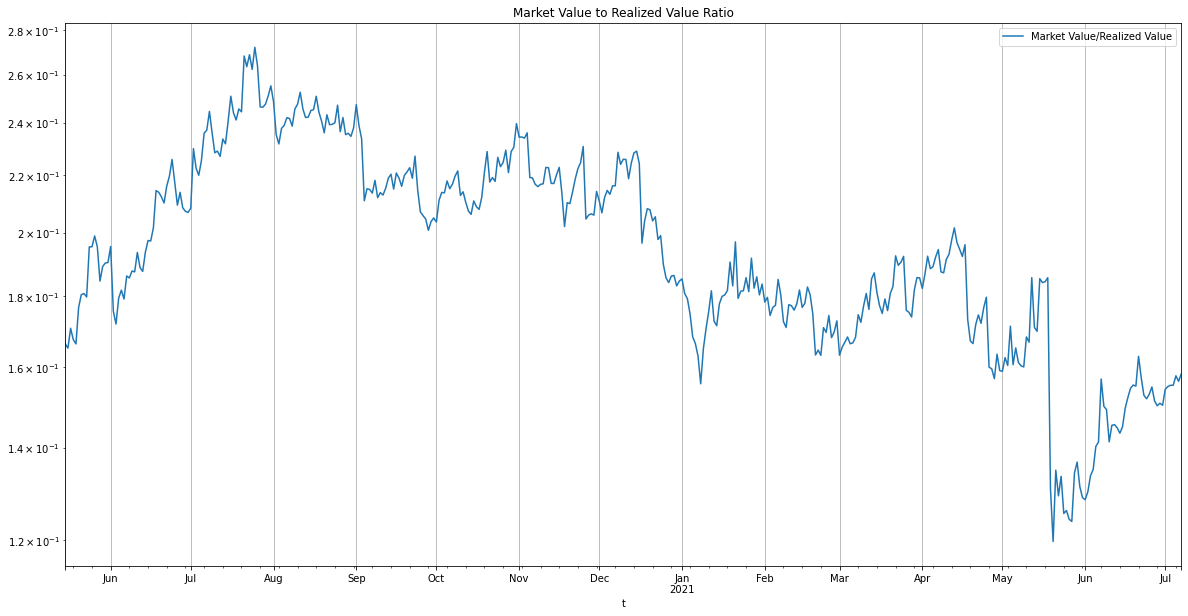

In [112]:
mvrv_df.plot(figsize=(20,10), grid=True, logy=True, title='Market Value to Realized Value Ratio')

In [113]:
## Extract Puell Multiple

In [114]:
puell = requests.get('https://api.glassnode.com/v1/metrics/indicators/puell_multiple', params={'a': coin, 'api_key': API_KEY})

In [115]:
puell_df = pd.read_json(puell.text, convert_dates=['t'])
puell_df.set_index('t', inplace=True)
puell_df = puell_df.rename(columns={'v':'Puell Multiple'})
puell_df

,Puell Multiple
t,
2011-07-16,3.656330
2011-07-17,3.830945
2011-07-18,3.691357
2011-07-19,3.244558
2011-07-20,3.366804
...,...
2021-07-03,1.029800
2021-07-04,0.954134
2021-07-05,1.058615


<AxesSubplot:title={'center':'Puell Multiple'}, xlabel='t'>

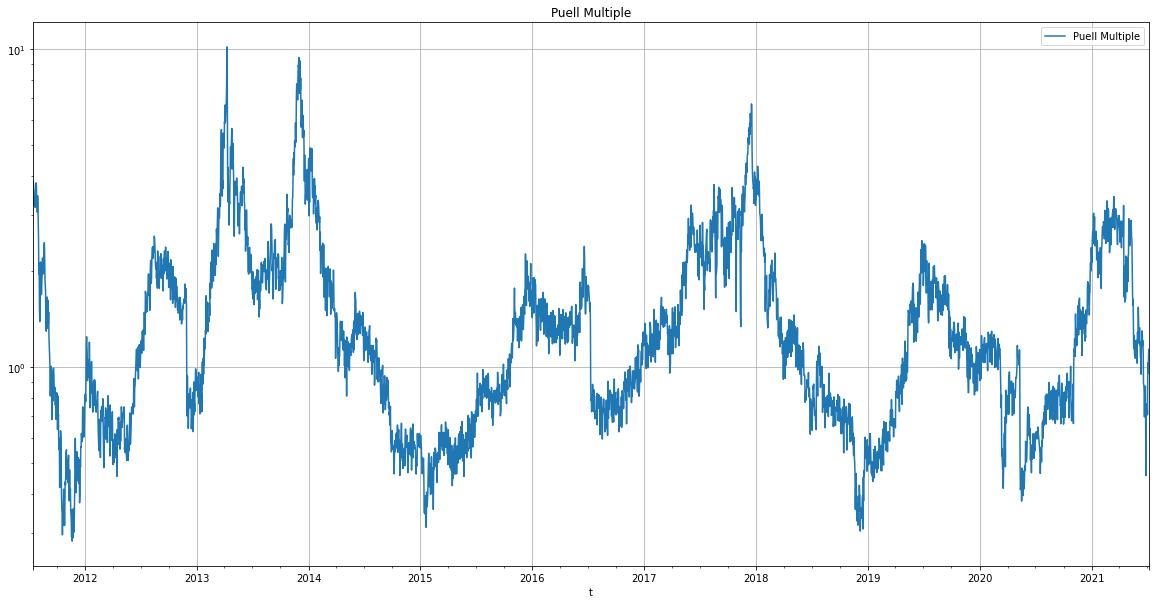

In [116]:
puell_df.plot(figsize=(20,10), grid=True, logy=True, title='Puell Multiple')

In [117]:
## Extract Stablecoin Supply Ratio (SSR) Oscillator

In [118]:
ssro = requests.get('https://api.glassnode.com/v1/metrics/indicators/ssr_oscillator', params={'a': coin, 'api_key': API_KEY})

In [119]:
ssro_df = pd.read_json(ssro.text, convert_dates=['t'])
ssro_df.set_index('t', inplace=True)
ssro_df = ssro_df.rename(columns={'v':'Stablecoin Supply Ratio (SSR) Oscillator'})
ssro_df

,Stablecoin Supply Ratio (SSR) Oscillator
t,
2018-09-04,-0.833493
2018-09-05,-0.887271
2018-09-06,-1.171063
2018-09-07,-1.163901
2018-09-08,-1.198452
...,...
2021-07-03,-1.715302
2021-07-04,-1.663843
2021-07-05,-1.681967


<AxesSubplot:title={'center':'Stablecoin Supply Ratio (SSR) Oscillator'}, xlabel='t'>

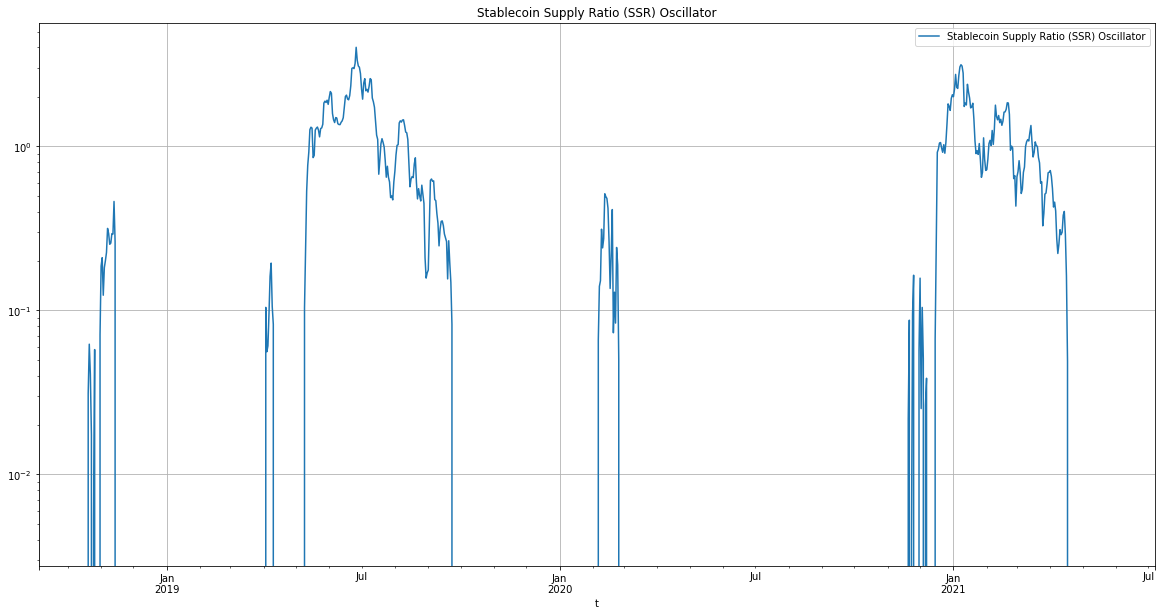

In [120]:
ssro_df.plot(figsize=(20,10), grid=True, logy=True, title='Stablecoin Supply Ratio (SSR) Oscillator')

In [121]:
## Extract Exchange Net Position Change

In [122]:
enpc = requests.get('https://api.glassnode.com/v1/metrics/distribution/exchange_net_position_change', params={'a': coin, 'api_key': API_KEY})

In [123]:
enpc_df = pd.read_json(enpc.text, convert_dates=['t'])
enpc_df.set_index('t', inplace=True)
enpc_df = enpc_df.rename(columns={'v':'Exchange Net Position Change'})
enpc_df

,Exchange Net Position Change
t,
2011-09-16,74.789093
2011-09-17,69.740065
2011-09-18,30.148647
2011-09-19,38.196675
2011-09-20,36.377675
...,...
2021-07-03,-22722.934188
2021-07-04,-19281.410009
2021-07-05,-19880.665177


<AxesSubplot:title={'center':'Exchange Net Position Change'}, xlabel='t'>

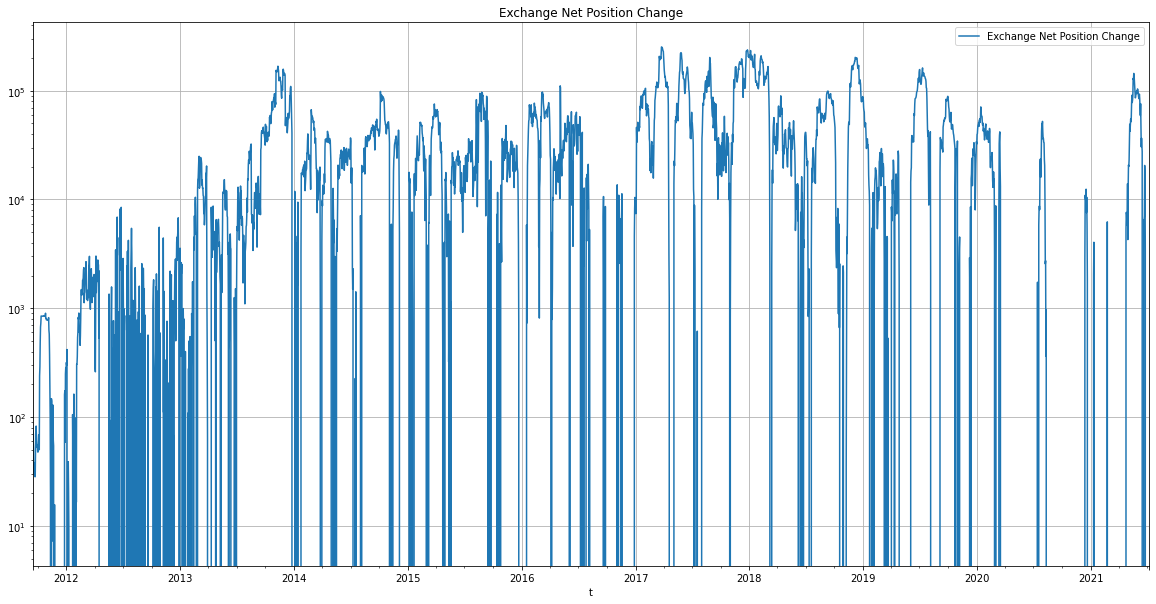

In [124]:
enpc_df.plot(figsize=(20,10), grid=True, logy=True, title='Exchange Net Position Change')

In [125]:
## Extract Grayscale Premium

In [126]:
gp = requests.get('https://api.glassnode.com/v1/metrics/institutions/grayscale_premium_percent', params={'a': coin, 'api_key': API_KEY})

In [127]:
gp_df = pd.read_json(gp.text, convert_dates=['t'])
gp_df.set_index('t', inplace=True)
gp_df = gp_df.rename(columns={'v':'Grayscale Premium'})
gp_df

,Grayscale Premium
t,
2021-01-08,0.174900
2021-01-09,0.174900
2021-01-10,0.174900
2021-01-11,0.156400
2021-01-12,0.180200
...,...
2021-07-03,-0.088357
2021-07-04,-0.088357
2021-07-05,-0.088357


<AxesSubplot:title={'center':'Grayscale Premium'}, xlabel='t'>

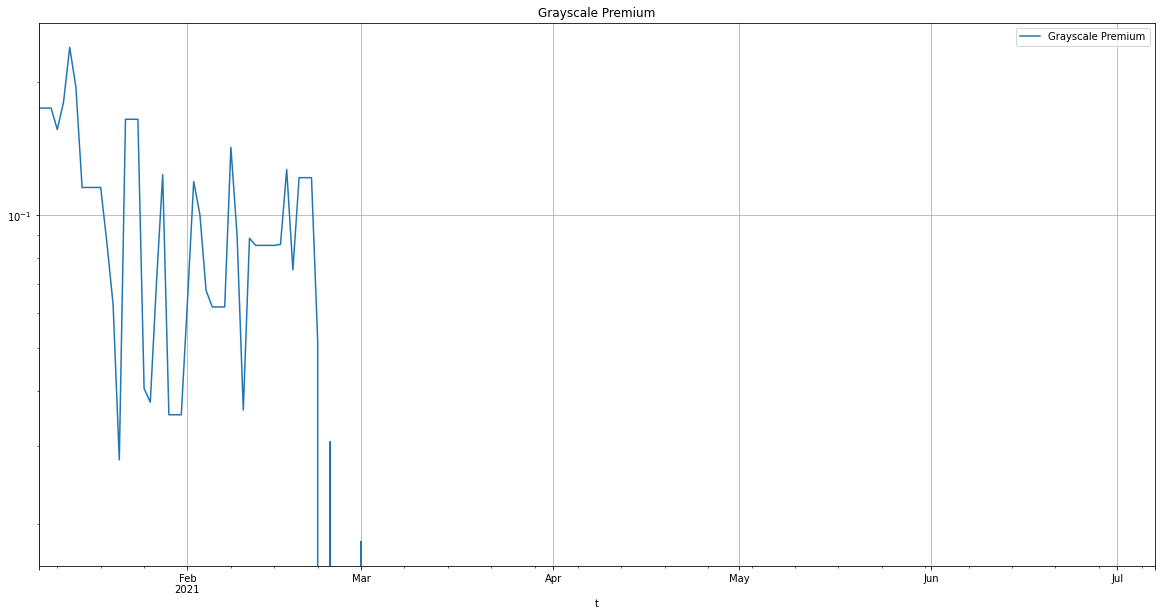

In [128]:
gp_df.plot(figsize=(20,10), grid=True, logy=True, title='Grayscale Premium')

In [129]:
## Extract Block Interval Mean

In [130]:
bim = requests.get('https://api.glassnode.com/v1/metrics/blockchain/block_interval_mean', params={'a': coin, 'api_key': API_KEY})

In [131]:
bim_df = pd.read_json(bim.text, convert_dates=['t'])
bim_df.set_index('t', inplace=True)
bim_df = bim_df.rename(columns={'v':'Block Interval Mean'})
bim_df

,Block Interval Mean
t,
2009-01-09,33506.000000
2009-01-10,2561.196721
2009-01-11,917.838710
2009-01-12,923.042553
2009-01-13,707.504065
...,...
2021-07-03,685.480315
2021-07-04,744.686957
2021-07-05,659.537879


<AxesSubplot:title={'center':'Block Interval Mean'}, xlabel='t'>

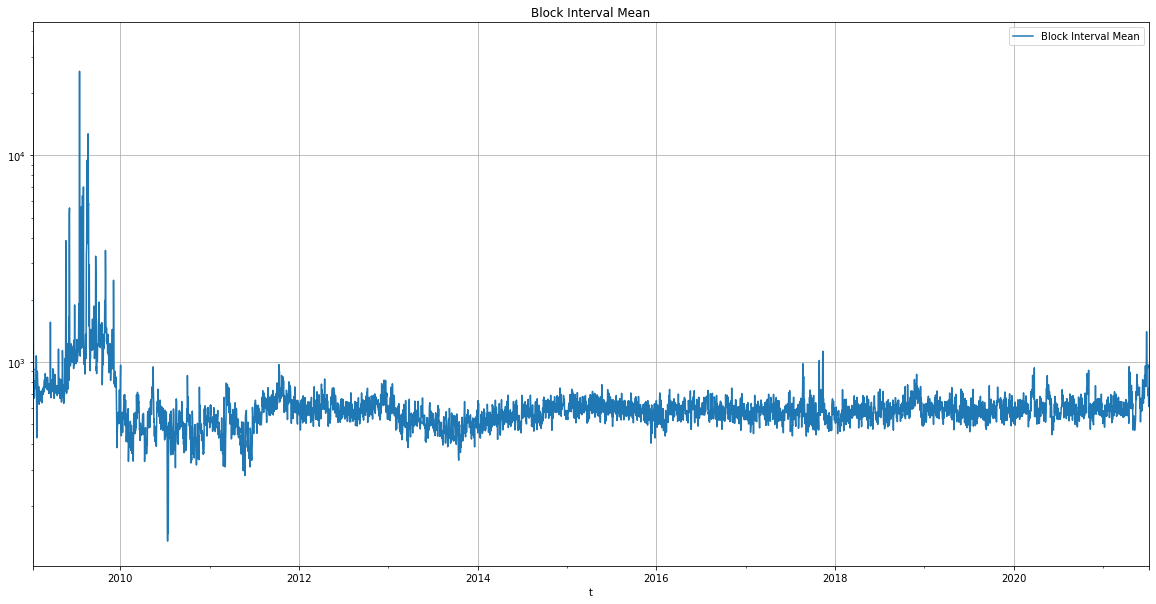

In [132]:
bim_df.plot(figsize=(20,10), grid=True, logy=True, title='Block Interval Mean')

In [133]:
# Set up the third of three sub-dataframes: Valuation

In [134]:
valuation_df_l2 = pd.concat([stf_df,mcttc_df,sopr_df,fpfr_df,felr_df,mvrv_df,puell_df,ssro_df,enpc_df,gp_df,bim_df],axis=1)
valuation_df_l2

,Stock to Flow,Market Cap/Thermo Cap,SOPR,Futures Peretual Funding Rates,Futures Estimated Leverage Ratio,Market Value/Realized Value,Puell Multiple,Stablecoin Supply Ratio (SSR) Oscillator,Exchange Net Position Change,Grayscale Premium,Block Interval Mean
t,,,,,,,,,,,
2009-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33506.000000
2009-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2561.196721
2009-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,917.838710
2009-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,923.042553
2009-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707.504065
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-03,0.441871,0.441871,1.001079,-0.000022,0.155232,0.155232,1.029800,-1.715302,-22722.934188,-0.088357,685.480315
2021-07-04,0.451348,0.451348,1.001935,0.000004,0.155267,0.155267,0.954134,-1.663843,-19281.410009,-0.088357,744.686957
2021-07-05,0.427749,0.427749,0.997970,-0.000166,0.157703,0.157703,1.058615,-1.681967,-19880.665177,-0.088357,659.537879


In [135]:
valuation_df_l2.corr()

,Stock to Flow,Market Cap/Thermo Cap,SOPR,Futures Peretual Funding Rates,Futures Estimated Leverage Ratio,Market Value/Realized Value,Puell Multiple,Stablecoin Supply Ratio (SSR) Oscillator,Exchange Net Position Change,Grayscale Premium,Block Interval Mean
Stock to Flow,1.000000,1.000000,0.400000,0.573139,-0.318372,-0.318372,0.628026,0.541024,0.081813,0.508228,-0.298692
Market Cap/Thermo Cap,1.000000,1.000000,0.400000,0.573139,-0.318372,-0.318372,0.628026,0.541024,0.081813,0.508228,-0.298692
SOPR,0.400000,0.400000,1.000000,0.261699,0.055573,0.055573,0.439055,0.539277,0.039905,0.493528,-0.262374
Futures Peretual Funding Rates,0.573139,0.573139,0.261699,1.000000,-0.567161,-0.567161,0.486902,-0.017368,0.209252,-0.232972,-0.327188
Futures Estimated Leverage Ratio,-0.318372,-0.318372,0.055573,-0.567161,1.000000,1.000000,-0.440776,-0.010075,-0.433515,0.333039,-0.245249
Market Value/Realized Value,-0.318372,-0.318372,0.055573,-0.567161,1.000000,1.000000,-0.440776,-0.010075,-0.433515,0.333039,-0.245249
Puell Multiple,0.628026,0.628026,0.439055,0.486902,-0.440776,-0.440776,1.000000,0.685848,0.264366,0.425487,-0.409154
Stablecoin Supply Ratio (SSR) Oscillator,0.541024,0.541024,0.539277,-0.017368,-0.010075,-0.010075,0.685848,1.000000,-0.044698,0.779166,-0.250350
Exchange Net Position Change,0.081813,0.081813,0.039905,0.209252,-0.433515,-0.433515,0.264366,-0.044698,1.000000,-0.451906,-0.100616
Grayscale Premium,0.508228,0.508228,0.493528,-0.232972,0.333039,0.333039,0.425487,0.779166,-0.451906,1.000000,-0.248732


In [136]:
# Due to high correlation, drop "Market Cap/Thermo Cap" and "Market Value/Realized Value"

In [137]:
valuation_df_l2 = valuation_df_l2.drop(columns=['Market Cap/Thermo Cap','Market Value/Realized Value'])
valuation_df_l2.corr()

,Stock to Flow,SOPR,Futures Peretual Funding Rates,Futures Estimated Leverage Ratio,Puell Multiple,Stablecoin Supply Ratio (SSR) Oscillator,Exchange Net Position Change,Grayscale Premium,Block Interval Mean
Stock to Flow,1.000000,0.400000,0.573139,-0.318372,0.628026,0.541024,0.081813,0.508228,-0.298692
SOPR,0.400000,1.000000,0.261699,0.055573,0.439055,0.539277,0.039905,0.493528,-0.262374
Futures Peretual Funding Rates,0.573139,0.261699,1.000000,-0.567161,0.486902,-0.017368,0.209252,-0.232972,-0.327188
Futures Estimated Leverage Ratio,-0.318372,0.055573,-0.567161,1.000000,-0.440776,-0.010075,-0.433515,0.333039,-0.245249
Puell Multiple,0.628026,0.439055,0.486902,-0.440776,1.000000,0.685848,0.264366,0.425487,-0.409154
Stablecoin Supply Ratio (SSR) Oscillator,0.541024,0.539277,-0.017368,-0.010075,0.685848,1.000000,-0.044698,0.779166,-0.250350
Exchange Net Position Change,0.081813,0.039905,0.209252,-0.433515,0.264366,-0.044698,1.000000,-0.451906,-0.100616
Grayscale Premium,0.508228,0.493528,-0.232972,0.333039,0.425487,0.779166,-0.451906,1.000000,-0.248732
Block Interval Mean,-0.298692,-0.262374,-0.327188,-0.245249,-0.409154,-0.250350,-0.100616,-0.248732,1.000000


In [138]:
# Build Feature Dataframe

In [139]:
X = pd.concat([network_health_df_l2,buyer_and_seller_behavior_df_l2,valuation_df_l2],axis=1)
X.corr()

,Active Address,Total Transfer Volume,Velocity,Circulating Supply,Issuance,Difficulty,Thermocap,UTXO,CYD,NUPL,Realized Cap,Stock to Flow,SOPR,Futures Peretual Funding Rates,Futures Estimated Leverage Ratio,Puell Multiple,Stablecoin Supply Ratio (SSR) Oscillator,Exchange Net Position Change,Grayscale Premium,Block Interval Mean
Active Address,1.000000,0.142214,-0.154729,0.878549,-0.810901,-0.546472,0.804081,-0.753805,0.807833,0.120582,0.747525,0.227358,-0.116249,0.486351,-0.085965,0.041285,0.310330,0.064710,0.352882,0.185877
Total Transfer Volume,0.142214,1.000000,0.884730,0.143275,-0.086743,-0.174596,0.000918,-0.142278,0.044376,0.069940,-0.059911,0.078728,-0.070345,-0.079591,-0.021743,0.100253,0.110266,0.046329,0.273633,0.061684
Velocity,-0.154729,0.884730,1.000000,-0.135756,0.187159,-0.014290,-0.204681,0.064538,-0.145288,0.027496,-0.191521,0.001199,-0.040593,0.032378,-0.221081,0.091035,0.087933,0.017424,-0.226245,0.002444
Circulating Supply,0.878549,0.143275,-0.135756,1.000000,-0.934478,-0.670978,0.700433,-0.944294,0.802088,-0.011506,0.680317,0.071569,-0.266100,-0.267636,-0.720523,-0.082759,-0.007344,0.061965,-0.834338,0.275519
Issuance,-0.810901,-0.086743,0.187159,-0.934478,1.000000,0.613801,-0.630161,0.899016,-0.760207,0.007799,-0.587114,-0.071859,0.277561,0.359169,0.218319,0.060539,0.076328,-0.060193,0.228777,-0.413008
Difficulty,-0.546472,-0.174596,-0.014290,-0.670978,0.613801,1.000000,-0.461438,0.637928,-0.348801,0.381975,-0.357413,0.295967,0.306043,-0.186966,-0.155039,0.489928,0.008151,0.243703,-0.178632,-0.443766
Thermocap,0.804081,0.000918,-0.204681,0.700433,-0.630161,-0.461438,1.000000,-0.577830,0.611318,-0.053906,0.950708,0.131779,-0.090442,-0.276248,-0.774737,-0.095732,-0.060801,-0.191021,-0.841585,0.260908
UTXO,-0.753805,-0.142278,0.064538,-0.944294,0.899016,0.637928,-0.577830,1.000000,-0.760605,0.097451,-0.571609,0.097451,0.385011,NaN,0.782829,0.024060,0.024690,-0.227774,NaN,-0.265660
CYD,0.807833,0.044376,-0.145288,0.802088,-0.760207,-0.348801,0.611318,-0.760605,1.000000,0.140360,0.757470,0.140360,-0.194316,NaN,-0.847959,0.141514,0.102357,0.372826,NaN,0.127643
NUPL,0.120582,0.069940,0.027496,-0.011506,0.007799,0.381975,-0.053906,0.097451,0.140360,1.000000,-0.019556,1.000000,0.407602,NaN,-0.595581,0.638033,0.633481,0.176191,NaN,-0.373156


In [140]:
# Questions:
# 1. Thermal Cap vs. Realized Cap
# 2. Columns that have limited data, should I keep them?
# 3. Dropna necessary?